# Spaceship Titanic Predictions

### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

---

## About

The **Spaceship Titanic** is a fictional interstellar voyage where an anomaly in spacetime has caused passengers to be mysteriously transported to an alternate dimension.

You are provided with personal records of the passengers, and the goal is to **predict whether each passenger was transported** based on these attributes. The data was partially recovered from the ship's damaged computer system.

This project simulates a **real-world classification problem** and is ideal for building an **end-to-end MLOps pipeline** from data ingestion to deployment.

---

## 1) Problem Statement

After the Spaceship Titanic’s collision with the anomaly, the transport records were corrupted. You are tasked with creating a machine learning model to predict whether a passenger was **Transported** to an alternate dimension.

This model can help the ship's investigation committee understand what factors contributed to the disappearance and automate future anomaly responses.

- **Objective**: Predict the `Transported` (True/False) status using passenger data.
- **Type**: Binary Classification Problem

---

## 2) Data Acquisition & Inspection

The dataset is provided in three CSV files:

- `train.csv` – Contains training data 
- `test.csv` – Used for final predictions 
- `sample_submission.csv` – Sample submission format for Kaggle

Each row represents a unique passenger with features such as:

- Personal information: `HomePlanet`, `CryoSleep`, `Cabin`, `Destination`, `Age`, `VIP`, `Name`
- Spending features: `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`
- Target column: `Transported` (only in train data)

---

### 2.1 Load Data and Libraries

**Importing Pandas, Numpy, Matplotlib, Seaborn, math**

In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import chi2_contingency
import math

**Import the CSV Data as Pandas DataFrame**

In [408]:
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [409]:
test_df = pd.read_csv('test.csv')
passenger_ids = test_df['PassengerId']
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### 2.2 Shape of dataset

In [410]:
print(train_df.shape)
print(test_df.shape)


(8693, 14)
(4277, 13)


### 2.3 Summary of dataset

In [411]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [412]:
train_df.describe(include = ["object", "bool"])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
count,8693,8492,8476,8494,8511,8490,8493,8693
unique,8693,3,2,6560,3,2,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall,True
freq,1,4602,5439,8,5915,8291,2,4378


### 2.4 Check Datatypes in the dataset

In [413]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### 2.5 Checking Null Values

In [414]:
# Count of missing values per column
missing_train = train_df.isnull().sum()
missing_percent = (missing_train / len(train_df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_train,
    'Percent Missing': missing_percent
})
print(missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percent Missing', ascending=False))


              Missing Values  Percent Missing
CryoSleep                217         2.496261
ShoppingMall             208         2.392730
VIP                      203         2.335212
HomePlanet               201         2.312205
Name                     200         2.300702
Cabin                    199         2.289198
VRDeck                   188         2.162660
FoodCourt                183         2.105142
Spa                      183         2.105142
Destination              182         2.093639
RoomService              181         2.082135
Age                      179         2.059128


### 2.6 Check Duplicates & Unique Values

In [415]:
print(f"No. of duplicates: {train_df.duplicated().sum()}")
print(f"No. of unique values per column: \n{train_df.nunique().sort_values()}")

No. of duplicates: 0
No. of unique values per column: 
CryoSleep          2
VIP                2
Transported        2
HomePlanet         3
Destination        3
Age               80
ShoppingMall    1115
RoomService     1273
VRDeck          1306
Spa             1327
FoodCourt       1507
Cabin           6560
Name            8473
PassengerId     8693
dtype: int64


---
## 3) Exploratory Data Analysis

### 3.1 Data Preprocessing and EDA

In [416]:
# Columns related to spend
spend_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

for df in [train_df, test_df]:
    # Split Cabin
    df[["Deck", "CabinNo", "Side"]] = df["Cabin"].str.split("/", expand=True)
    df["CabinNo"] = pd.to_numeric(df["CabinNo"], errors="coerce")
    
    # Split PassengerId
    df[["Group", "Passenger"]] = df["PassengerId"].str.split("_", expand=True)
    df["Passenger"] = pd.to_numeric(df["Passenger"], errors="coerce")
    df["Group"] = pd.to_numeric(df["Group"], errors="coerce")
    
    # Compute Total Spend
    df["TotalSpend"] = df[spend_cols].sum(axis=1)
    
    # Compute GroupSize and IsAlone
    group_counts = df["Group"].value_counts()
    df["GroupSize"] = df["Group"].map(group_counts)
    df["IsAlone"] = df["GroupSize"] == 1


In [417]:
train_df.drop(["Cabin", "PassengerId", "Name"], axis = 1, inplace = True)
test_df.drop(["Cabin", "PassengerId", "Name"], axis=1, inplace=True)
train_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,CabinNo,Side,Group,Passenger,TotalSpend,GroupSize,IsAlone
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0.0,P,1,1,0.0,1,True
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0.0,S,2,1,736.0,1,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0.0,S,3,1,10383.0,2,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0.0,S,3,2,5176.0,2,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1.0,S,4,1,1091.0,1,True


In [418]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
 11  Deck          8494 non-null   object 
 12  CabinNo       8494 non-null   float64
 13  Side          8494 non-null   object 
 14  Group         8693 non-null   int64  
 15  Passenger     8693 non-null   int64  
 16  TotalSpend    8693 non-null   float64
 17  GroupSize     8693 non-null   int64  
 18  IsAlone       8693 non-null 

In [419]:
train_df.isnull().sum().sort_values(ascending = False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Side            199
CabinNo         199
Deck            199
VRDeck          188
Spa             183
FoodCourt       183
Destination     182
RoomService     181
Age             179
Transported       0
Group             0
Passenger         0
TotalSpend        0
GroupSize         0
IsAlone           0
dtype: int64

### 3.2 Defining Numerical and Categorical Column

In [420]:
# Get columns from train_df only
train_numeric_features = train_df.select_dtypes(include=['float64', 'int64']).columns
train_categorical_features = train_df.select_dtypes(include=['object', 'category', 'bool']).columns

# Drop 'Transported' if it's in the categorical list (target variable)
train_categorical_features = train_categorical_features.drop('Transported', errors='ignore')

# Apply imputation to both train and test using values from train_df
for df in [train_df, test_df]:
    for col in train_numeric_features:
        if col in df.columns and df[col].isnull().sum() > 0:
            median_val = train_df[col].median()
            df[col].fillna(median_val, inplace=True)

    for col in train_categorical_features:
        if col in df.columns and df[col].isnull().sum() > 0:
            mode_val = train_df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)


### 3.2 Checking the Proprotion Count of Categorical Columns

In [421]:
# proportion of count data on categorical columns
for col in train_categorical_features:
    print(train_df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

HomePlanet
Earth     55.251352
Europa    24.513977
Mars      20.234672
Name: proportion, dtype: float64
---------------------------
CryoSleep
False    65.063844
True     34.936156
Name: proportion, dtype: float64
---------------------------
Destination
TRAPPIST-1e      70.136892
55 Cancri e      20.706315
PSO J318.5-22     9.156793
Name: proportion, dtype: float64
---------------------------
VIP
False    97.710802
True      2.289198
Name: proportion, dtype: float64
---------------------------
Deck
F    34.430001
G    29.437478
E    10.077074
B     8.961233
C     8.593121
D     5.498677
A     2.944898
T     0.057518
Name: proportion, dtype: float64
---------------------------
Side
S    51.616243
P    48.383757
Name: proportion, dtype: float64
---------------------------
IsAlone
True     55.274359
False    44.725641
Name: proportion, dtype: float64
---------------------------


**Insights:**

- `PassengerID`, `Cabin` and `Name` have unique vlaues for each column which can be dropped as it it of no importance
- `VIP` and `CryoSleep` seems to be an important column as most of them are not VIP and not in CryoSleep.
- `HomePlanet` and `Destination` most of the are from Earth and heading to TRAPPIST-1e
- `Cabin` Split it into Deck (letter), Cabin Number, and Side (P/S) or group rare decks.

### 3.3 Univariate Analysis of Numerical Features

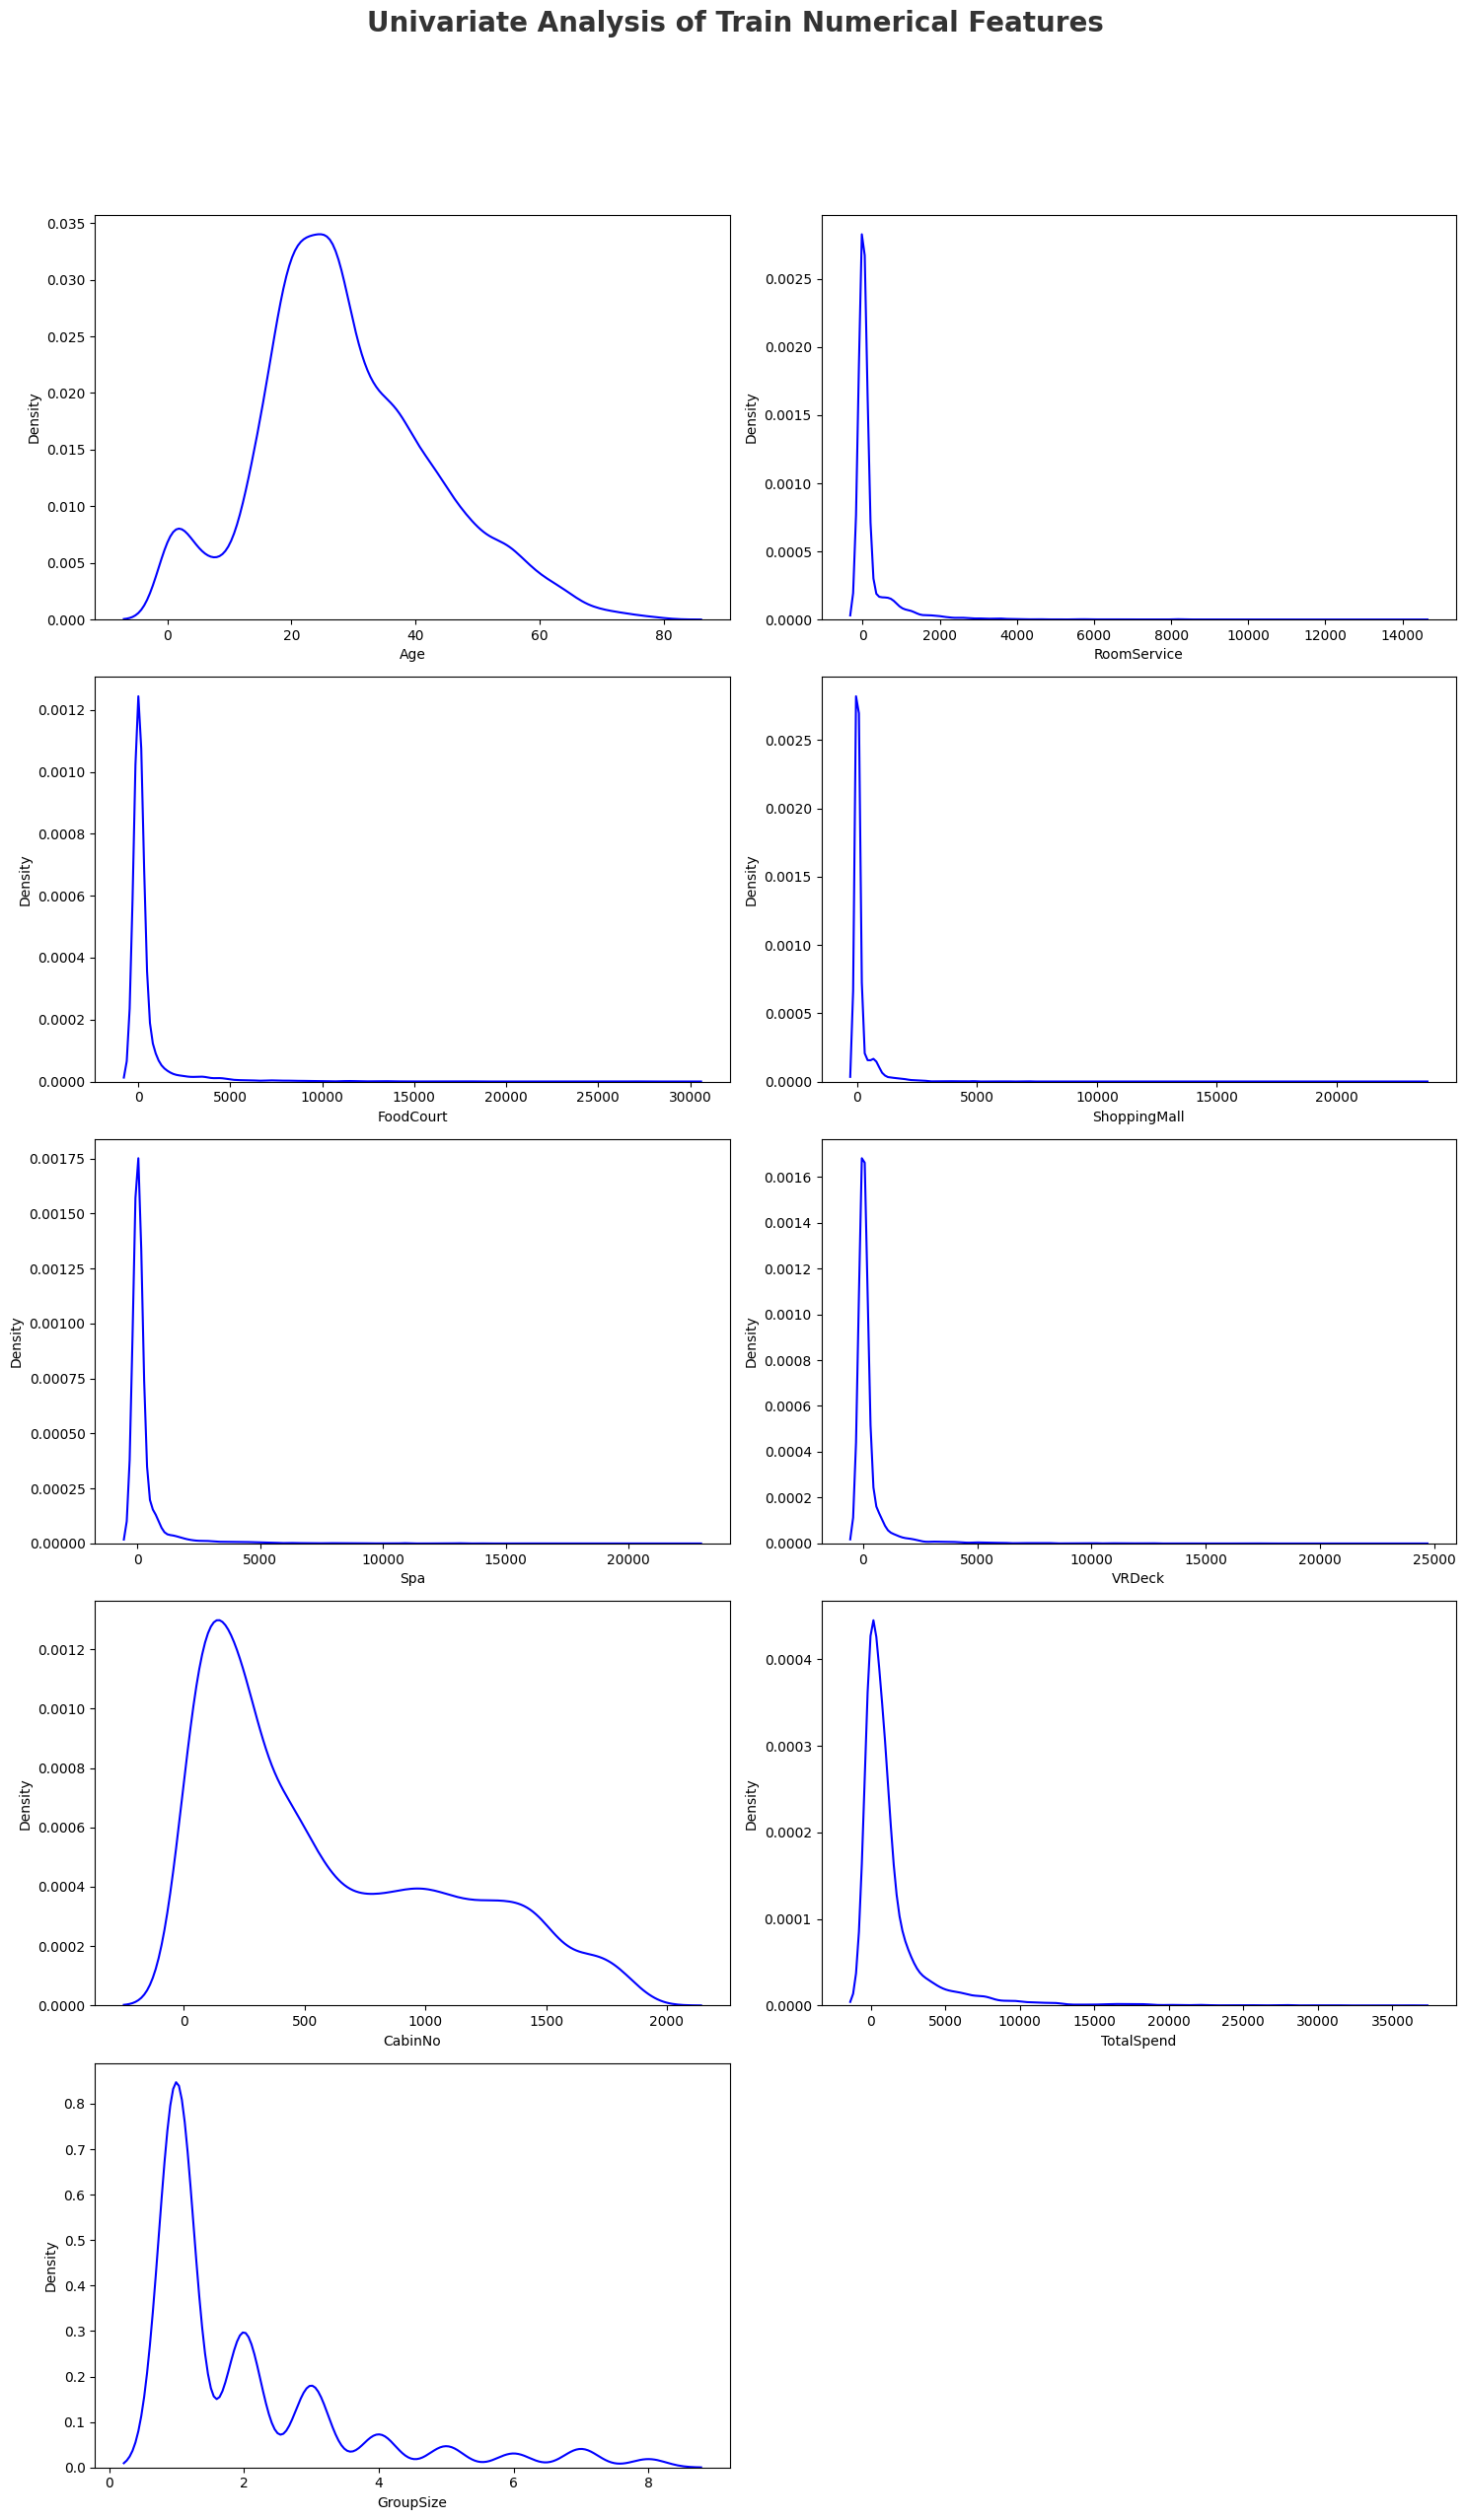

In [422]:
# Numerical features distribution
train_numeric_features = [col for col in train_numeric_features if col not in ['Passenger','Group']]
rows = math.ceil(len(train_numeric_features) / 2)
fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))
fig.suptitle('Univariate Analysis of Train Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

# Flatten axes for easy indexing
axes = axes.flatten()

for i, feature in enumerate(train_numeric_features):
    sns.kdeplot(x=train_df[feature], ax=axes[i], color='blue')
    axes[i].set_xlabel(feature)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


**Insight: Skewness in Numerical Feature Distributions**

From the univariate analysis of numerical features, we observe distinct distribution patterns:

- **`Age`** shows a near-normal distribution, peaking around the early 20s, suggesting a concentration of younger passengers. This implies that the majority of travelers were young adults.
- **`RoomService`**, **`FoodCourt`**, **`ShoppingMall`**, **`Spa`**, and **`VRDeck`** all demonstrate **strong right skewness**:
  - Most passengers spent **little to no money** on these services.
  - A **small minority spent excessively**, stretching the distribution tails.

📌 **Implications**:
- These right-skewed features may benefit from **log transformation** during preprocessing to reduce skewness and stabilize variance.
- This distribution may indicate economic disparities or differing service preferences among passengers.



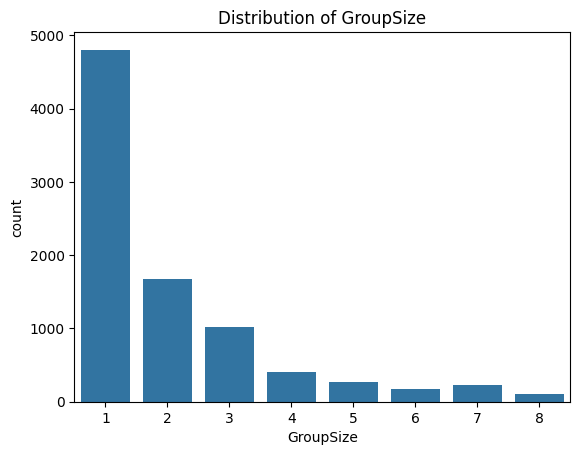

In [423]:
sns.countplot(x = "GroupSize", data = train_df)
plt.title(f"Distribution of GroupSize")
plt.show()

### 3.4 Univariate Analysis of Categorical Features

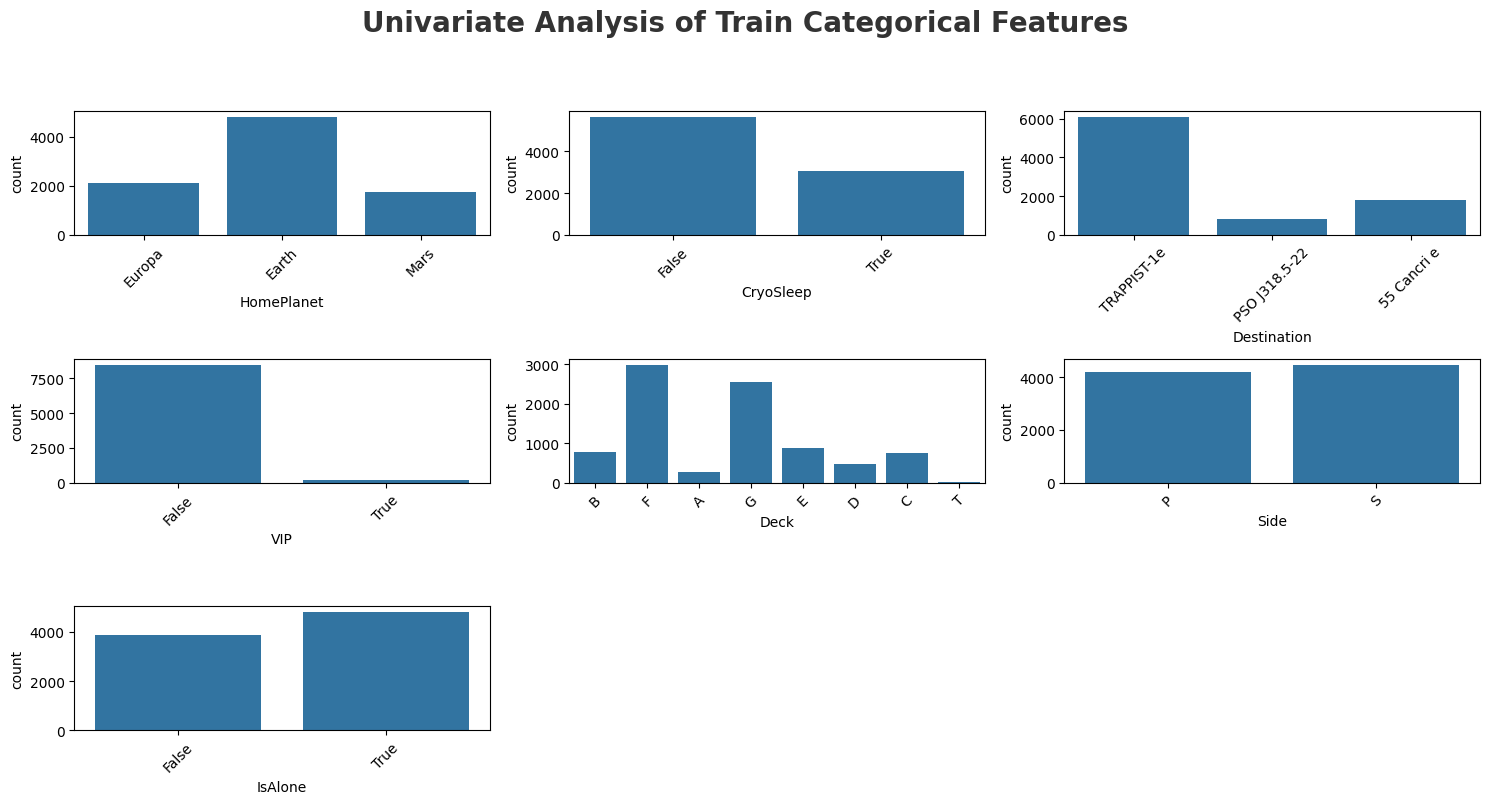

In [424]:
# Categorical features distribution
train_categorical_features = [col for col in train_categorical_features if col not in ['Cabin', 'Name','PassengerId']]

# Create the plot
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Train Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(train_categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=train_df[train_categorical_features[i]])
    plt.xlabel(train_categorical_features[i])
    plt.xticks(rotation=45)

# Tight layout should be outside the loop
plt.tight_layout(rect=[0, 0, 1, 0.95])


**Insight: Distribution of Categorical Features**

The univariate analysis of categorical features reveals several notable patterns:

- **`HomePlanet`**:
  - Most passengers originated from **Earth**, followed by **Europa** and **Mars**.
  - This may reflect Earth being the primary hub or launch point for interstellar travel.

- **`CryoSleep`**:
  - A majority of passengers **were not in cryosleep** 

- **`Destination`**:
  - **TRAPPIST-1e** was the most common destination by far, indicating it may have been the main or default route.
  - **55 Cancri e** and **PSO J318.5-22** were far less frequent.

- **`VIP`**:
  - Very few passengers were marked as **VIP**—the vast majority were regular travelers.
  - This points to a heavily economy or standard-class population.

- **`Transported`**:
  - The **target variable** appears **evenly distributed** between `True` and `False`, showing **no significant class imbalance**. This is favorable for classification model training.

These patterns provide early clues about the demographics, service usage, and class dynamics of passengers—useful for feature engineering and downstream modeling tasks.


### 3.5 Check Multicollinearity in Numerical features

In [425]:
train_discrete_features=[feature for feature in train_numeric_features if len(train_df[feature].unique())<=25]

train_continuous_features=[feature for feature in train_numeric_features if len(train_df[feature].unique()) > 25]

print('We have {} train_discrete features : {}'.format(len(train_discrete_features), train_discrete_features))
print('\nWe have {} train_continuous_features : {}'.format(len(train_continuous_features), train_continuous_features))

We have 1 train_discrete features : ['GroupSize']

We have 8 train_continuous_features : ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CabinNo', 'TotalSpend']


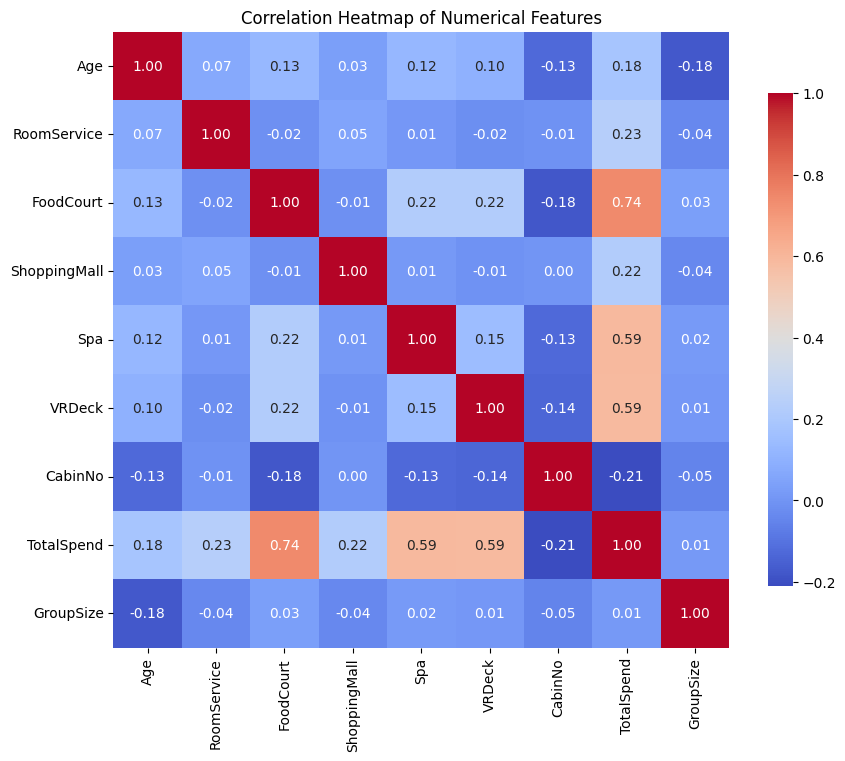

In [426]:
plt.figure(figsize=(10, 8))
corr = train_df[train_numeric_features].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={'shrink': 0.8})
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

**Insights**

- Passengers’ total spend is driven by FoodCourt, Spa, and VRDeck expenses (correlations > 0.6).

### 3.6 Check Multicollinearity for Categorical features
- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

- A chi-square statistic is one way to show a relationship between two categorical variables.

- Here we test correlation of Categorical columns with Target column i.e Transported

Null Hypothesis (
): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis (
): The Feature and Target column are not independent (Correalted)

In [427]:
chi2_test = []
for feature in train_categorical_features:
    if chi2_contingency(pd.crosstab(train_df['Transported'], train_df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[train_categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,HomePlanet,Reject Null Hypothesis
1,CryoSleep,Reject Null Hypothesis
2,Destination,Reject Null Hypothesis
3,VIP,Reject Null Hypothesis
4,Deck,Reject Null Hypothesis
5,Side,Reject Null Hypothesis
6,IsAlone,Reject Null Hypothesis



**Insights**

- All categorical features (`HomePlanet`, `CryoSleep`, `Destination`, `VIP`, `Deck`, `Side`, `IsAlone`) show significant association with the target variable `Transported` (p < 0.05), indicating they are likely informative for prediction.

- Further tests (e.g., Cramér's V or pairwise Chi-Square tests between features) are needed to assess multicollinearity among categorical variables.


#### 3.6.1 Cramér's V Test

In [428]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))  # Bias correction
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# List of categorical features to check pairwise
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side', 'IsAlone']

# Create empty matrix
cramer_matrix = pd.DataFrame(index=cat_features, columns=cat_features)

# Fill matrix
for col1 in cat_features:
    for col2 in cat_features:
        if col1 == col2:
            cramer_matrix.loc[col1, col2] = 1.0
        else:
            confusion_matrix = pd.crosstab(train_df[col1], train_df[col2])
            cramer_matrix.loc[col1, col2] = round(cramers_v(confusion_matrix), 3)

cramer_matrix = cramer_matrix.astype(float)
cramer_matrix

,HomePlanet,CryoSleep,Destination,VIP,Deck,Side,IsAlone
HomePlanet,1.000,0.111,0.256,0.171,0.729,0.039,0.265
CryoSleep,0.111,1.000,0.118,0.077,0.316,0.021,0.091
Destination,0.256,0.118,1.000,0.043,0.239,0.004,0.119
VIP,0.171,0.077,0.043,1.000,0.193,0.000,0.031
Deck,0.729,0.316,0.239,0.193,1.000,0.026,0.250
Side,0.039,0.021,0.004,0.000,0.026,1.000,0.024
IsAlone,0.265,0.091,0.119,0.031,0.250,0.024,1.000


**Insights:**
- Deck and HomePlanet exhibit a strong association (Cramer’s V = 0.753), indicating decks are largely planet-specific and may introduce redundancy.
- Deck ↔ CryoSleep (0.334) and HomePlanet ↔ IsAlone (0.271) show moderate-to-weak links; all other pairs fall below 0.25.
- Side has negligible association with every feature, and aside from the Deck–HomePlanet pair, there’s minimal multicollinearity risk among these categoricals.


In [429]:
train_continues_features=[feature for feature in train_numeric_features if len(train_df[feature].unique())>=10]
print('Num of train continues features :',train_continues_features)

Num of train continues features : ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CabinNo', 'TotalSpend']


### 3.7 Feature Distribution Report

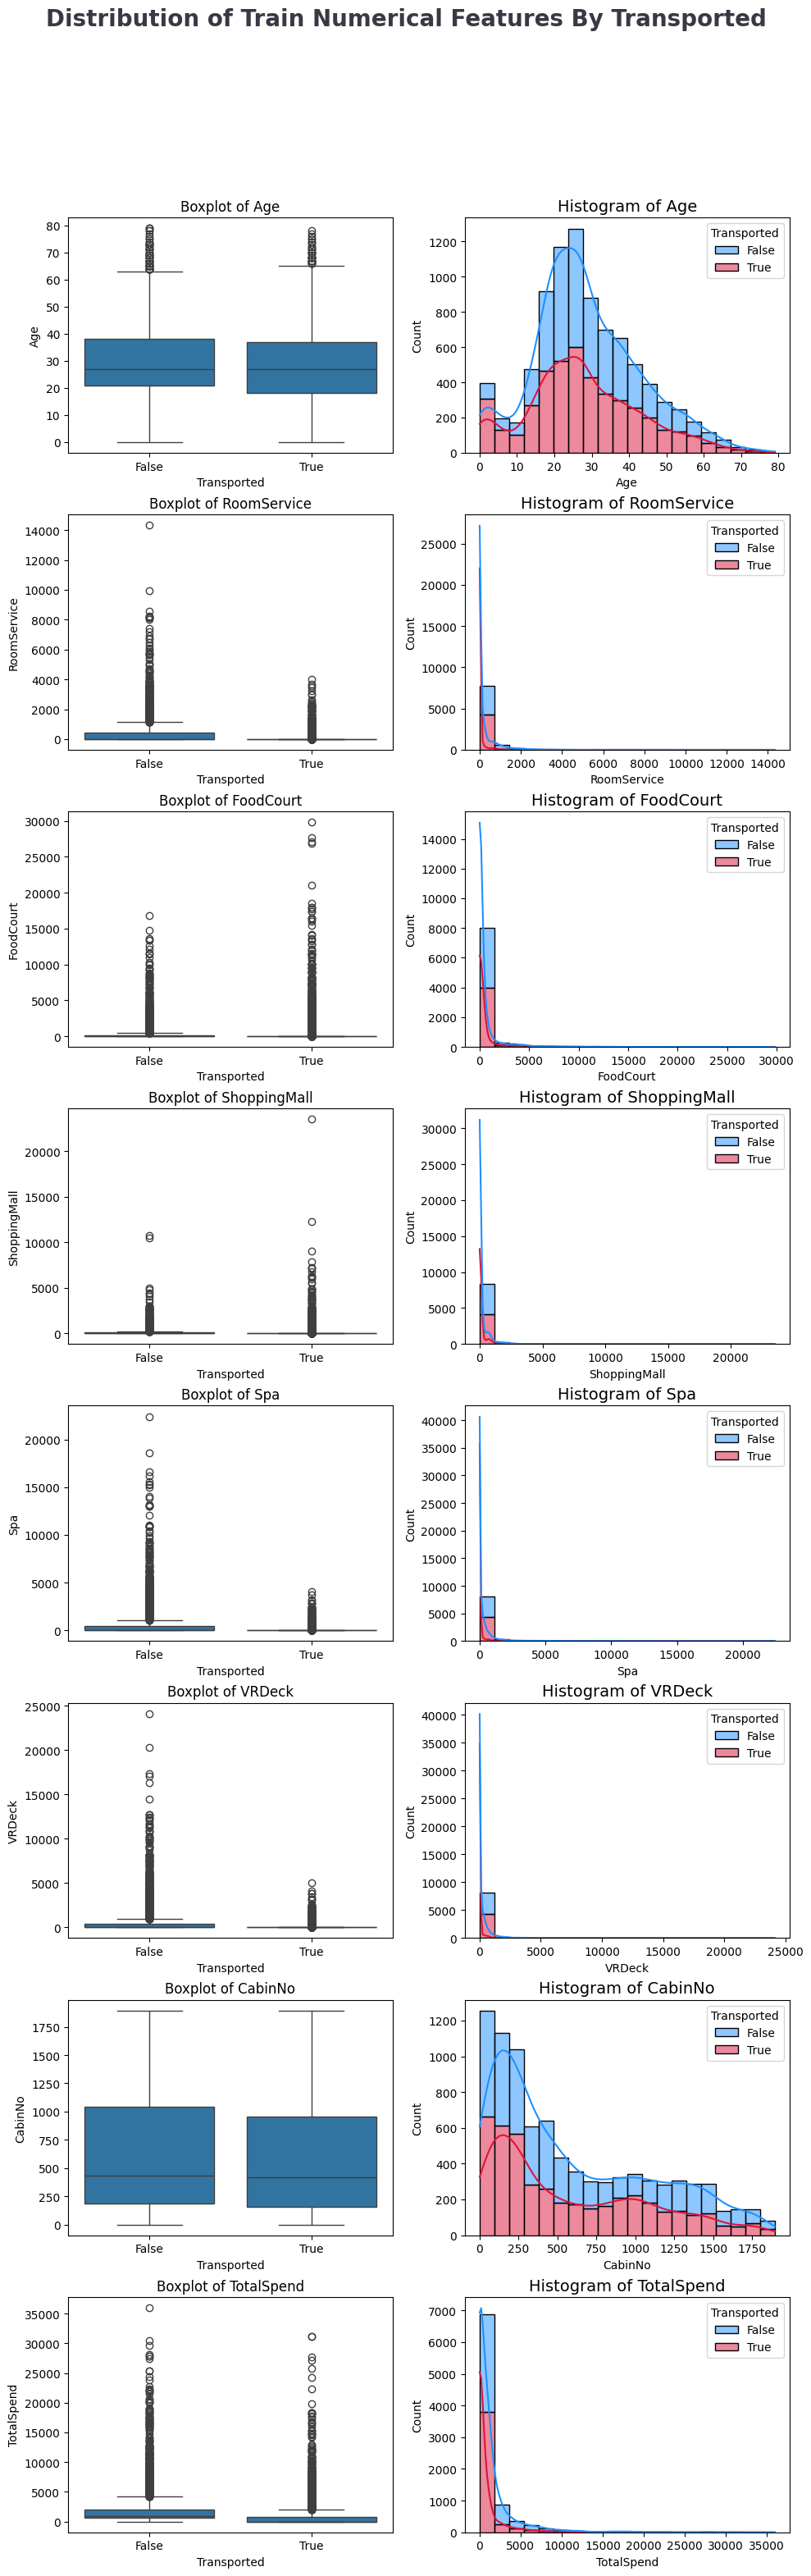

In [430]:
clr1 = ['#1E90FF', '#DC143C']  # Blue, Crimson, ForestGreen  # Add more colors if needed after checking unique values
train_num_features = len(train_continues_features)

fig, ax = plt.subplots(train_num_features, 2, figsize=(10, 4*train_num_features))
fig.suptitle('Distribution of Train Numerical Features By Transported', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')

for i, col in enumerate(train_continues_features):   
    # Boxplot without palette since no hue
    sns.boxplot(data=train_df, x='Transported', y=col, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)

    # Histogram with hue and palette
    sns.histplot(data=train_df, x=col, hue='Transported', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)

fig.tight_layout()
fig.subplots_adjust(top=0.90)


**Report:**

**Key Takeaways**
- `Age`: Transported group skews younger.
- `Expenses (RoomService, FoodCourt, Spa, etc.)`: Highly skewed with many low values and few large outliers.
- `VRDeck & Spa`: Slightly higher usage among transported passengers.

**Observations**
- Data is `right-skewed` with `outlier`.
- Behavioral features may influence `Transported`.

**Next Moves**
- Try log transforms.
- Run a quick feature importance check.


---
## 4) Data Visualization

#### 4.1 Visualize Target Feature

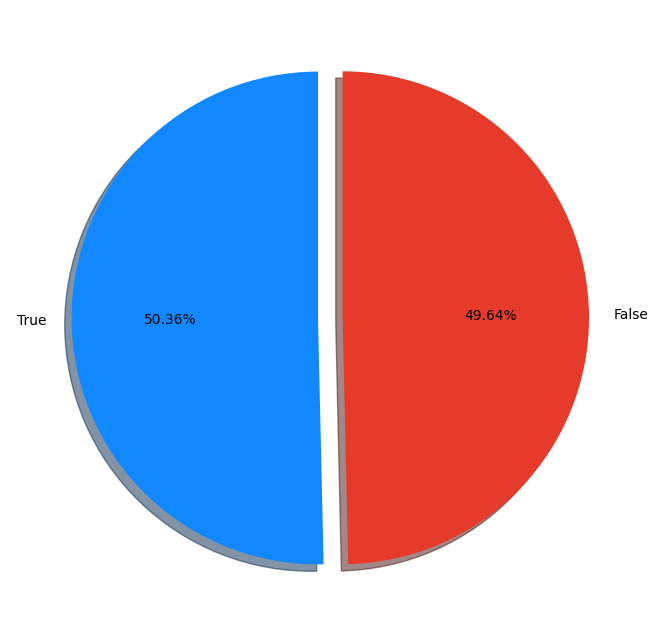

In [431]:
# Get percentage and corresponding labels dynamically
percentage = train_df.Transported.value_counts(normalize=True) * 100
labels = percentage.index.astype(str).tolist()  # Convert index to list of strings

# Adjust explode and colors accordingly
explode = [0.1 if label == "False" else 0 for label in labels]
colors = ['#1188ff', '#e63a2a'][:len(labels)]

# Plot PieChart with Matplotlib
fig, ax = plt.subplots(figsize=(15, 8))
ax.pie(percentage, labels=labels, startangle=90,
       autopct='%1.2f%%', explode=explode, shadow=True, colors=colors)
plt.show()

**Report:** 

- From the chart it is seen that the Target Variable is balanced

#### 4.2 Does HomePlanet have any impact on being Transported?

In [432]:
train_df.groupby('HomePlanet')['Transported'].value_counts(normalize=True).to_frame()*100

proportion
HomePlanet Transported            
Earth      False         57.235061
           True          42.764939
Europa     True          65.884561
           False         34.115439
Mars       True          52.302445
           False         47.697555

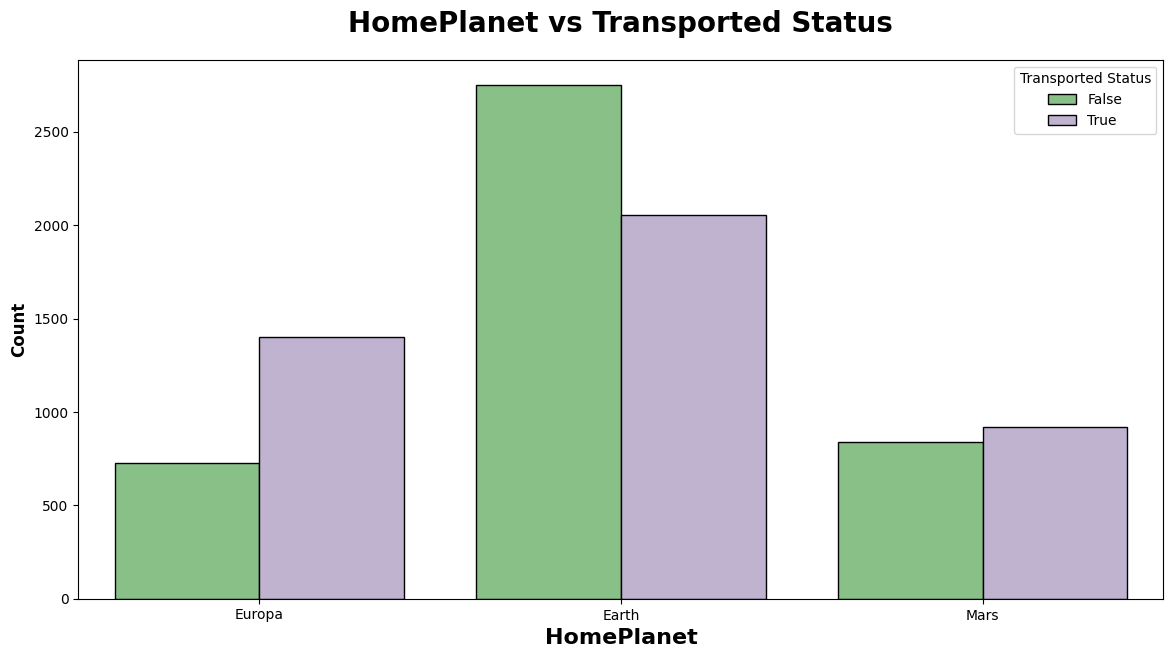

In [433]:
plt.subplots(figsize=(14,7))
sns.countplot(x="HomePlanet",hue="Transported", data=train_df, ec = "black",palette="Accent")
plt.title("HomePlanet vs Transported Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("HomePlanet", weight="bold", fontsize=16)
plt.legend(title="Transported Status", fancybox=True)
plt.show()

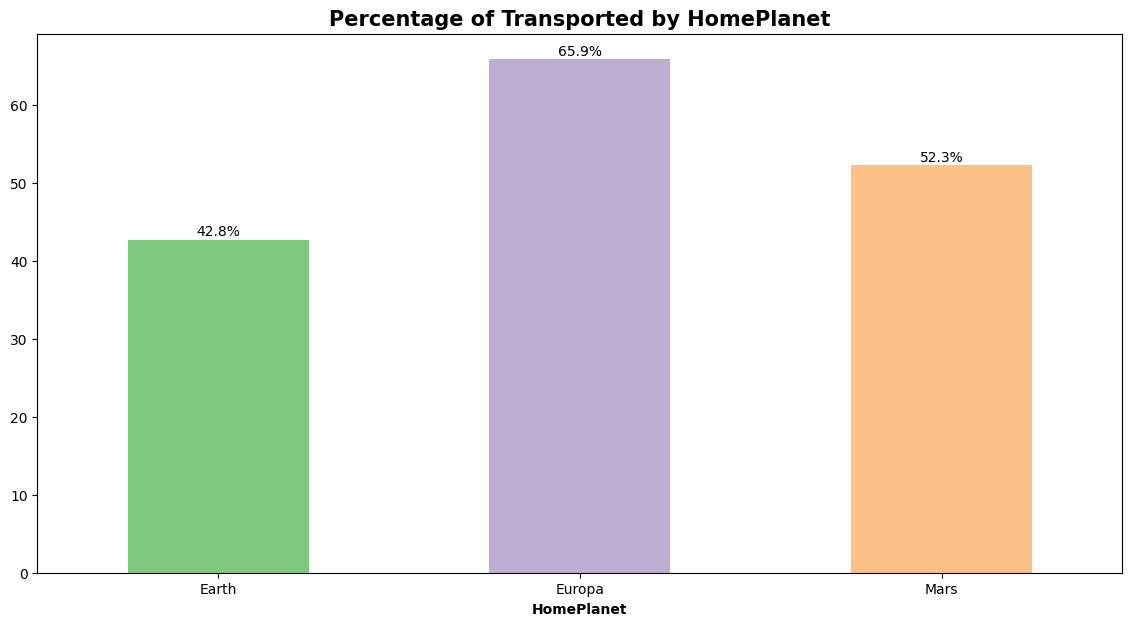

In [434]:
plt.figure(figsize=[14,7])

# groupby-mean gives proportion of True’s directly
pct_trans2 = train_df.groupby('HomePlanet')['Transported'].mean().mul(100)

pct_trans2.plot(kind='bar', color=plt.get_cmap('Accent').colors)
plt.title("Percentage of Transported by HomePlanet", fontsize=15, fontweight='bold')
plt.xlabel("HomePlanet", fontweight='bold')
plt.xticks(rotation=0)

for i, val in enumerate(pct_trans2):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center')

plt.show()

**Report:**

- Passengers from Europa have the highest transport rate, more than 7 out of 10 are transported.
- Mars shows an almost even split with roughly half of its passengers transported.
- Earth has the lowest rate, with fewer than half of its passengers transported.
- Homeplanet plays a significant role: origin from Europa greatly increases transport likelihood, while Earth origin corresponds to the lowest chance.

#### 4.3 Does CryoSleep Status have any impact on being Transported?

In [435]:
train_df.groupby('CryoSleep')['Transported'].value_counts(normalize=True).to_frame()*100

proportion
CryoSleep Transported            
False     False         66.495757
          True          33.504243
True      True          81.758314
          False         18.241686

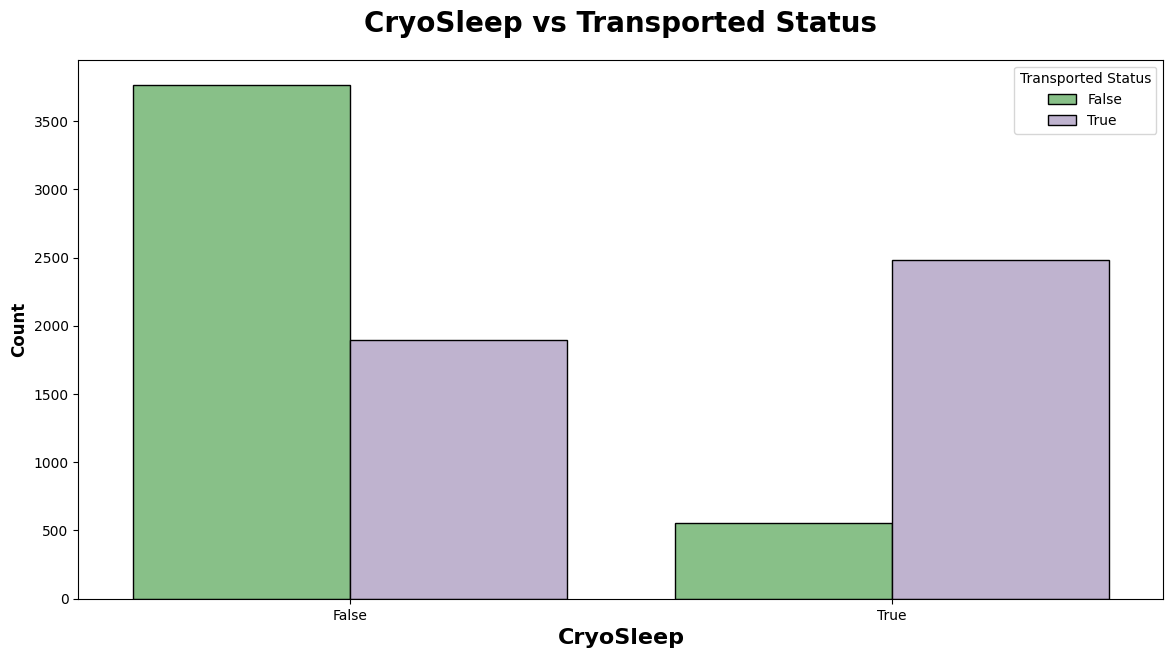

In [436]:
plt.subplots(figsize=(14,7))
sns.countplot(x="CryoSleep",hue="Transported", data=train_df, ec = "black",palette="Accent")
plt.title("CryoSleep vs Transported Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("CryoSleep", weight="bold", fontsize=16)
plt.legend(title="Transported Status", fancybox=True)
plt.show()

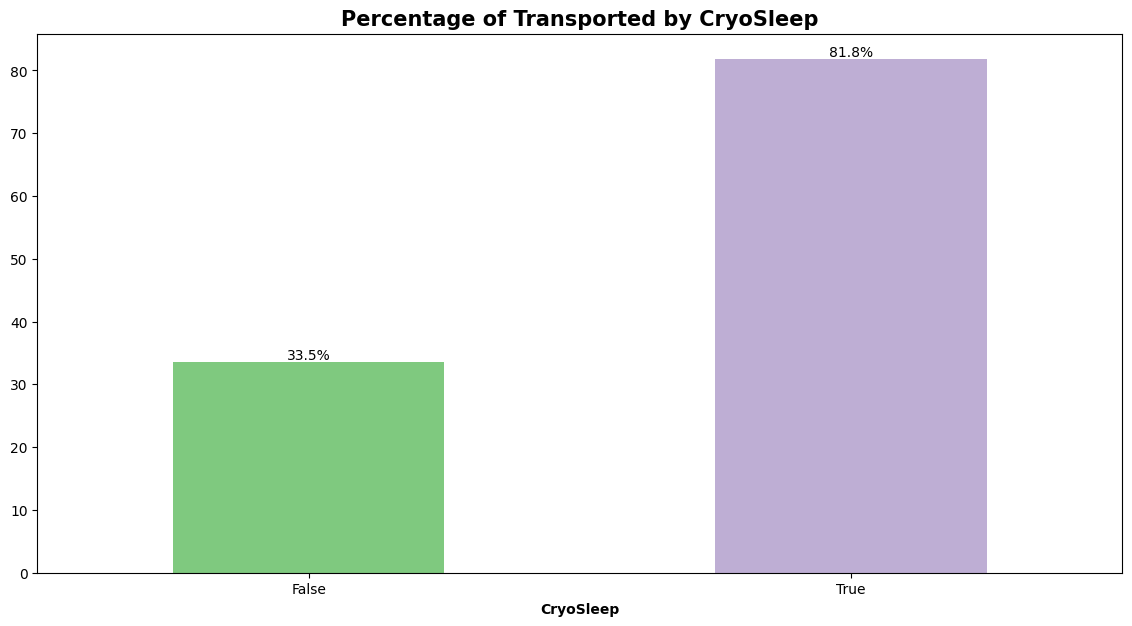

In [437]:
plt.figure(figsize=[14,7])

# groupby-mean gives proportion of True’s directly
pct_trans2 = train_df.groupby('CryoSleep')['Transported'].mean().mul(100)

pct_trans2.plot(kind='bar', color=plt.get_cmap('Accent').colors)
plt.title("Percentage of Transported by CryoSleep", fontsize=15, fontweight='bold')
plt.xlabel("CryoSleep", fontweight='bold')
plt.xticks(rotation=0)

for i, val in enumerate(pct_trans2):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center')

plt.show()

**Report:**

- Passengers in CryoSleep (True) have the highest transport rate at 81.8%.
- Those not in CryoSleep (False) show a lower transport rate of 32.9%.
- CryoSleep status significantly impacts transportation likelihood. Being in CryoSleep corresponds to a substantially higher chance of transport. 


#### 4.4 Does the destination influence the likelihood of being transported?

In [438]:
train_df.groupby('Destination')['Transported'].value_counts(normalize=True).to_frame()*100

proportion
Destination   Transported            
55 Cancri e   True          61.000000
              False         39.000000
PSO J318.5-22 True          50.376884
              False         49.623116
TRAPPIST-1e   False         52.780056
              True          47.219944

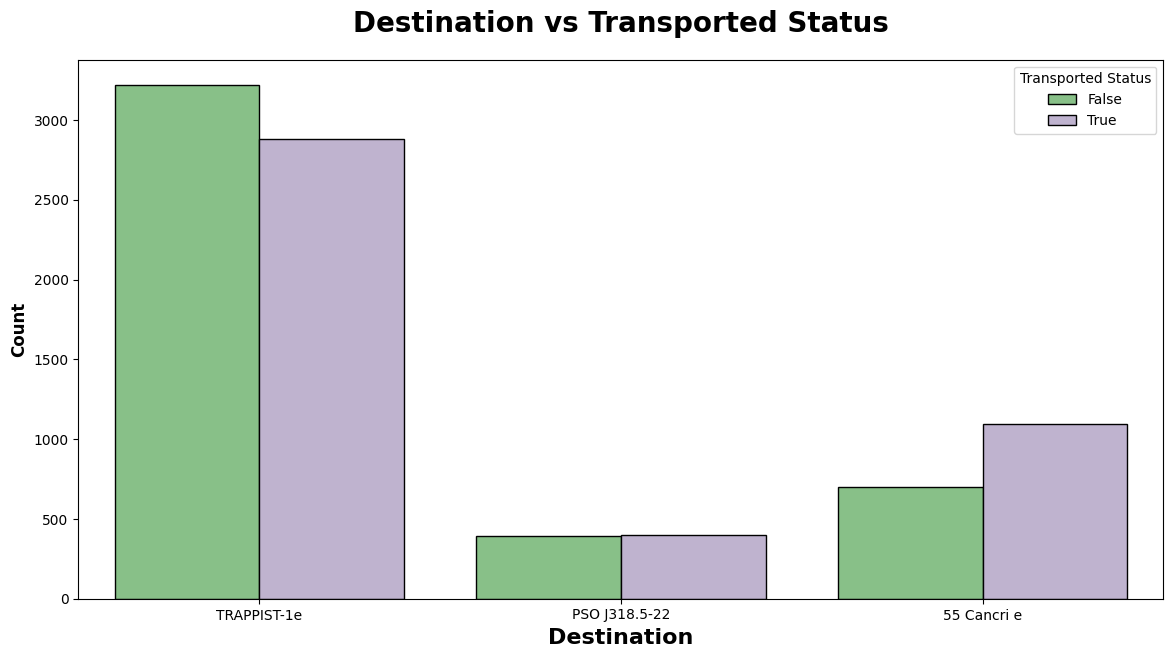

In [439]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Destination",hue="Transported", data=train_df, ec = "black",palette="Accent")
plt.title("Destination vs Transported Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Destination", weight="bold", fontsize=16)
plt.legend(title="Transported Status", fancybox=True)
plt.show()

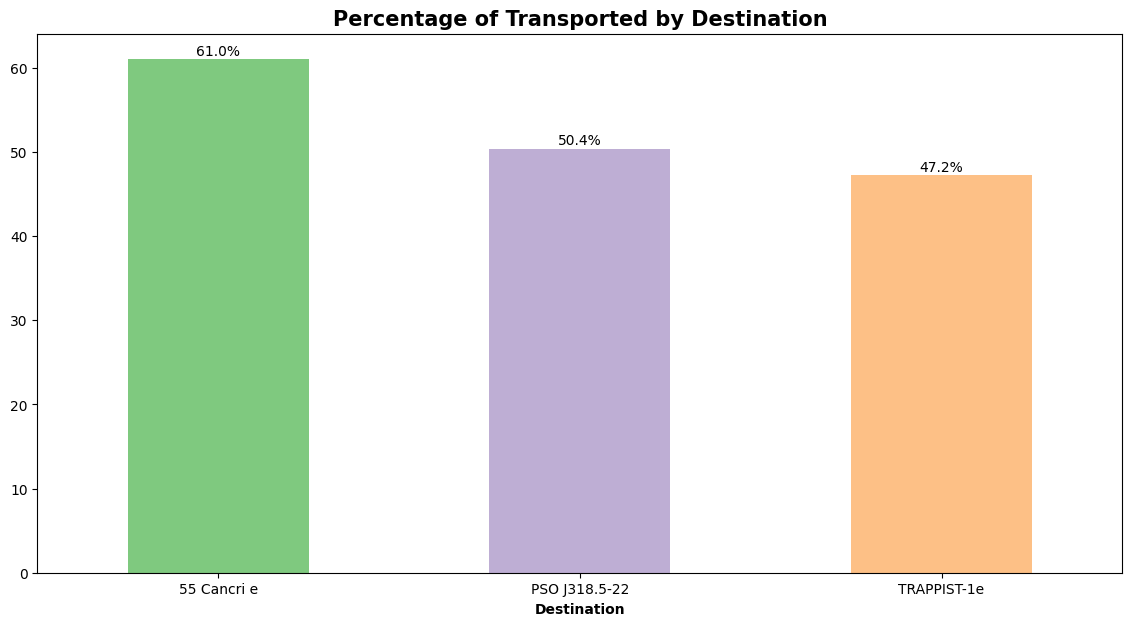

In [440]:
plt.figure(figsize=[14,7])

# groupby-mean gives proportion of True’s directly
pct_trans2 = train_df.groupby('Destination')['Transported'].mean().mul(100)

pct_trans2.plot(kind='bar', color=plt.get_cmap('Accent').colors)
plt.title("Percentage of Transported by Destination", fontsize=15, fontweight='bold')
plt.xlabel("Destination", fontweight='bold')
plt.xticks(rotation=0)

for i, val in enumerate(pct_trans2):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center')

plt.show()

**Report:**

- TRAPPIST-1e has the largest cohort, with transported and non-transported counts nearly even.
- PSO J318.5-22 and 55 Cancri e both show a slight majority of transported passengers.
- Destination exerts a modest influence on transport likelihood. Major destinations tend toward an even split, while smaller or unspecified groups can skew the observed rates

#### 4.5 Does VIP status influence transportation outcomes

In [441]:
train_df.groupby('VIP')['Transported'].value_counts(normalize=True).to_frame()*100

proportion
VIP   Transported            
False True          50.647516
      False         49.352484
True  False         61.809045
      True          38.190955

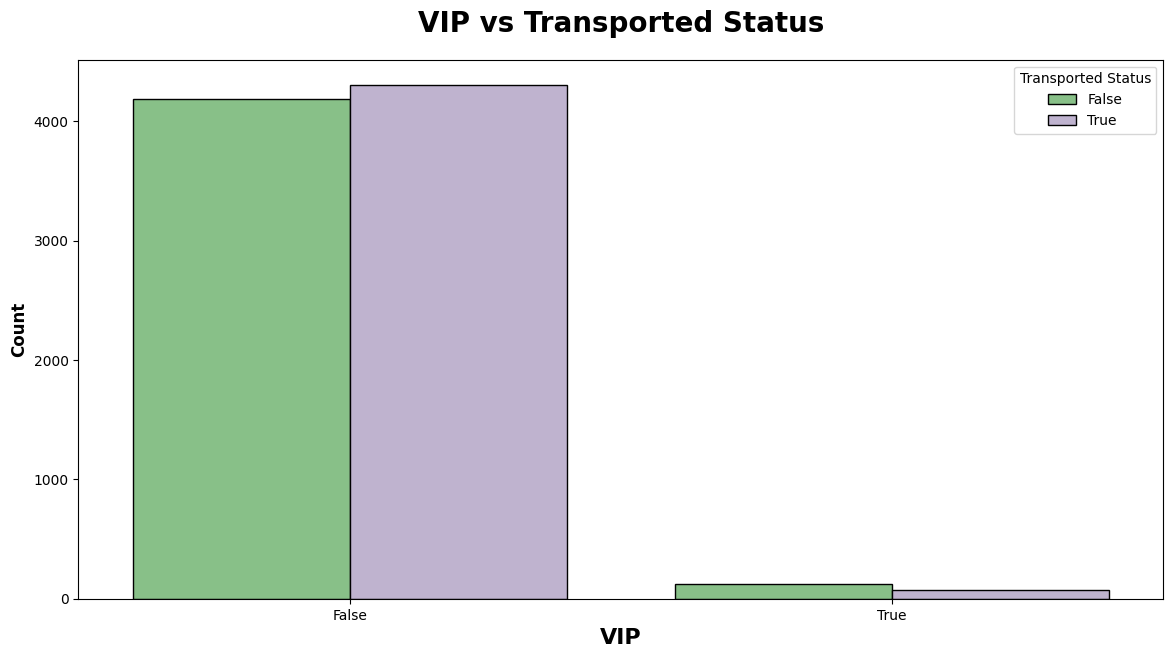

In [442]:
plt.subplots(figsize=(14,7))
sns.countplot(x="VIP",hue="Transported", data=train_df, ec = "black",palette="Accent")
plt.title("VIP vs Transported Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("VIP", weight="bold", fontsize=16)
plt.legend(title="Transported Status", fancybox=True)
plt.show()

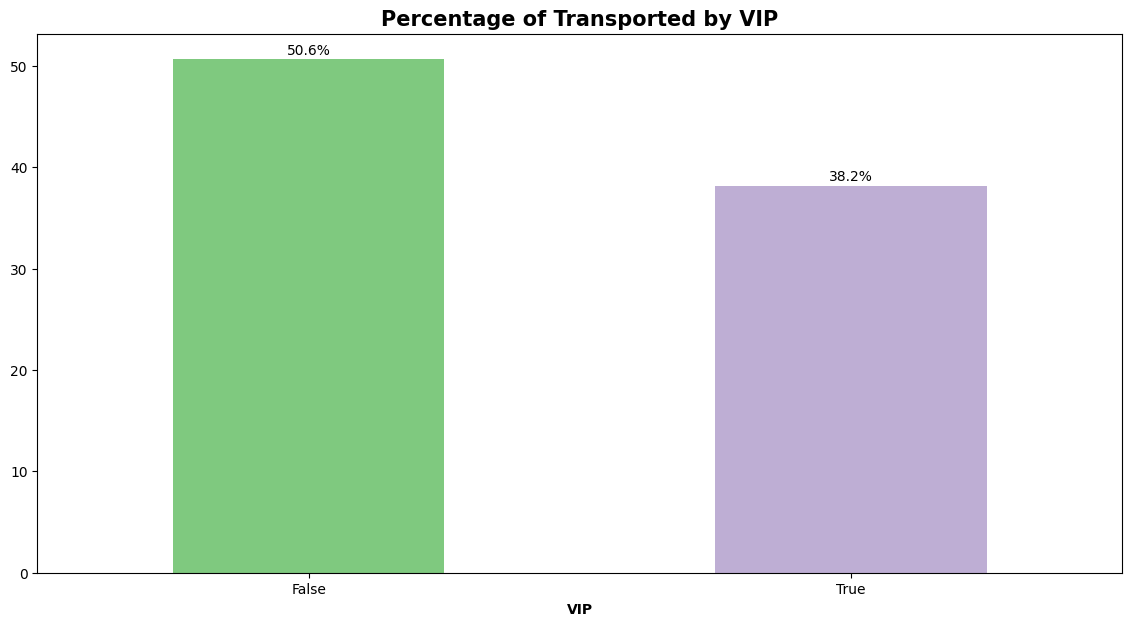

In [443]:
plt.figure(figsize=[14,7])

# groupby-mean gives proportion of True’s directly
pct_trans2 = train_df.groupby('VIP')['Transported'].mean().mul(100)

pct_trans2.plot(kind='bar', color=plt.get_cmap('Accent').colors)
plt.title("Percentage of Transported by VIP", fontsize=15, fontweight='bold')
plt.xlabel("VIP", fontweight='bold')
plt.xticks(rotation=0)

for i, val in enumerate(pct_trans2):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center')

plt.show()

**Report:**

- Non-VIP passengers make up the vast majority of the cohort, with transportation split roughly evenly.
- VIP passengers exhibit a higher transport rate (around 60%), though they represent a very small subset.
- The missing-status group is tiny and shows a lower transport rate (around 33%), but sample size limits reliability.
- VIP status appears to modestly increase the likelihood of being transported, but the effect is based on a small VIP population. Non-VIPs hover around a 50/50 chance, while missing data are too sparse for firm conclusions


#### 4.6 Does Deck Feature have influence transportation outcomes

In [444]:
train_df.groupby('Deck')['Transported'].value_counts(normalize=True).to_frame()*100

proportion
Deck Transported            
A    False         50.390625
     True          49.609375
B    True          73.427471
     False         26.572529
C    True          68.005355
     False         31.994645
D    False         56.694561
     True          43.305439
E    False         64.269406
     True          35.730594
F    False         55.596392
     True          44.403608
G    True          51.621727
     False         48.378273
T    False         80.000000
     True          20.000000

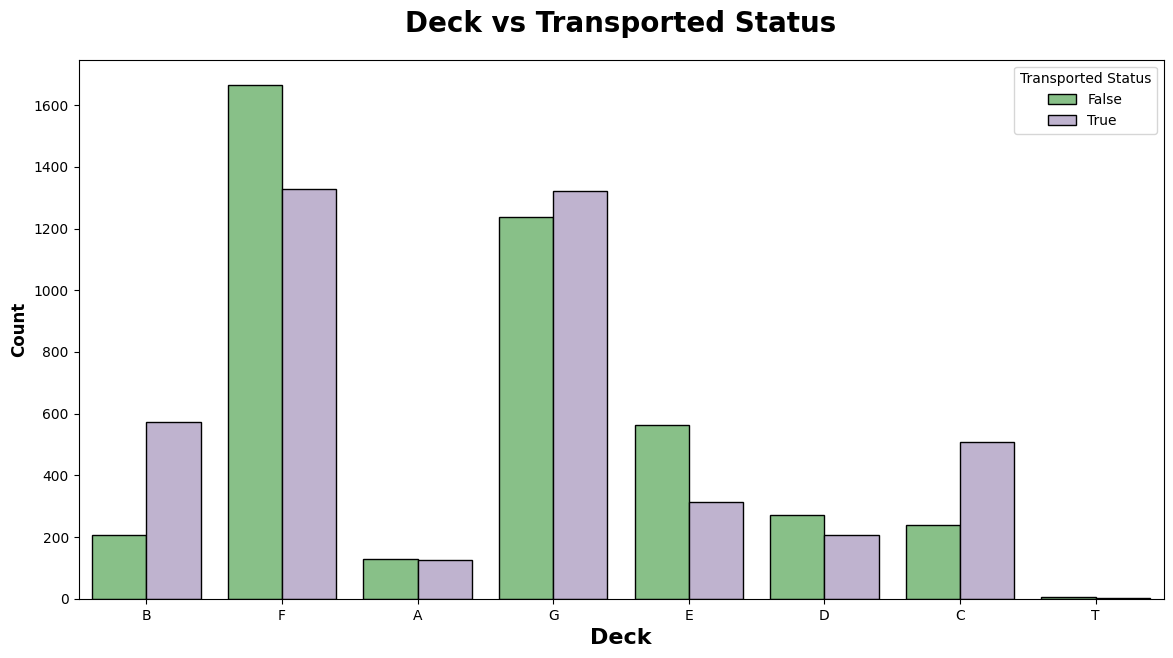

In [445]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Deck",hue="Transported", data=train_df, ec = "black",palette="Accent")
plt.title("Deck vs Transported Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Deck", weight="bold", fontsize=16)
plt.legend(title="Transported Status", fancybox=True)
plt.show()

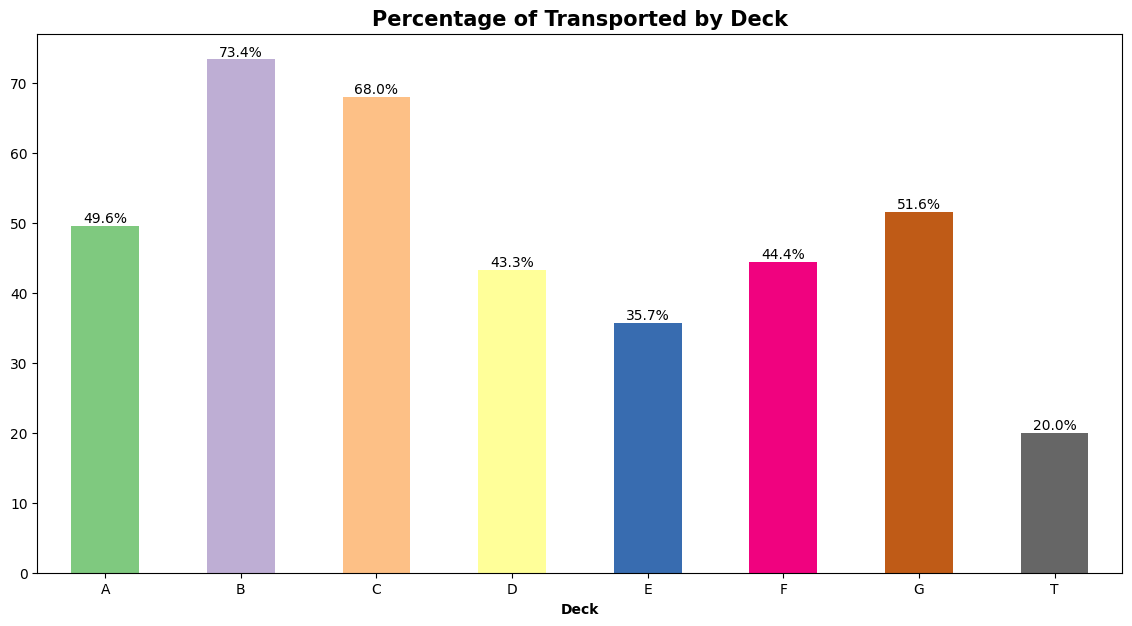

In [446]:
plt.figure(figsize=[14,7])

# groupby-mean gives proportion of True’s directly
pct_trans2 = train_df.groupby('Deck')['Transported'].mean().mul(100)

pct_trans2.plot(kind='bar', color=plt.get_cmap('Accent').colors)
plt.title("Percentage of Transported by Deck", fontsize=15, fontweight='bold')
plt.xlabel("Deck", fontweight='bold')
plt.xticks(rotation=0)

for i, val in enumerate(pct_trans2):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center')

plt.show()

**Insights**
- Deck F has the highest count of non-transported passengers, whereas Deck G leads in transported counts, highlighting a deck-specific transport disparity

#### 4.7 Does Side Feature have influence transportation outcomes

In [447]:
train_df.groupby('Side')['Transported'].value_counts(normalize=True).to_frame()*100

proportion
Side Transported            
P    False         54.873990
     True          45.126010
S    True          55.270782
     False         44.729218

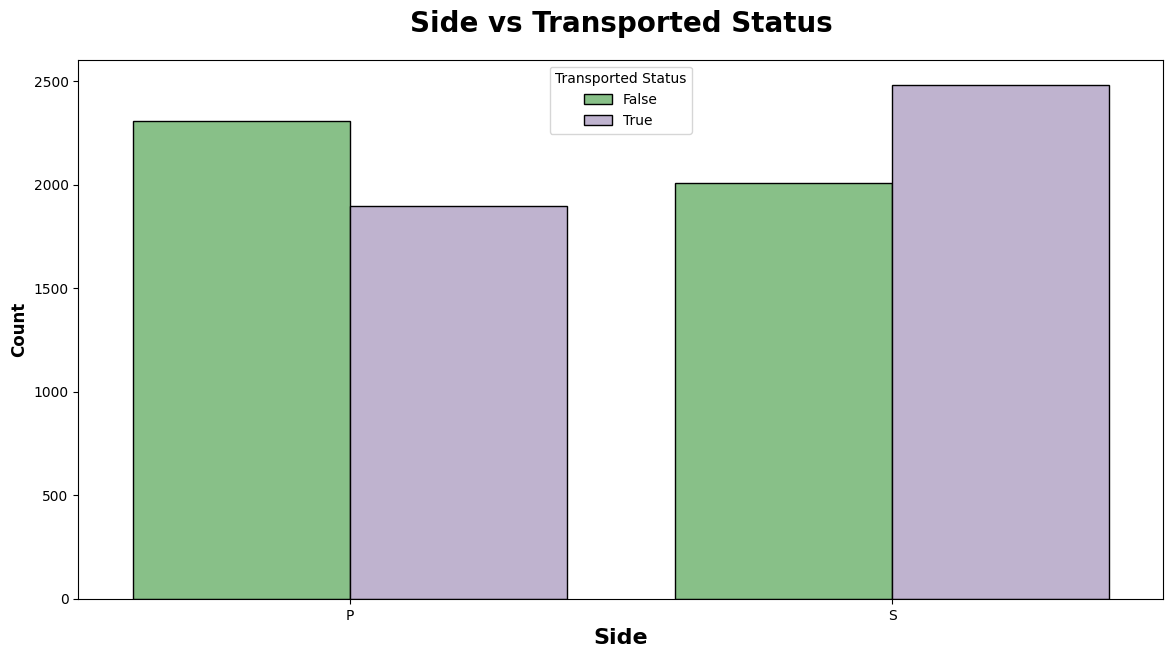

In [448]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Side",hue="Transported", data=train_df, ec = "black",palette="Accent")
plt.title("Side vs Transported Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Side", weight="bold", fontsize=16)
plt.legend(title="Transported Status", fancybox=True)
plt.show()

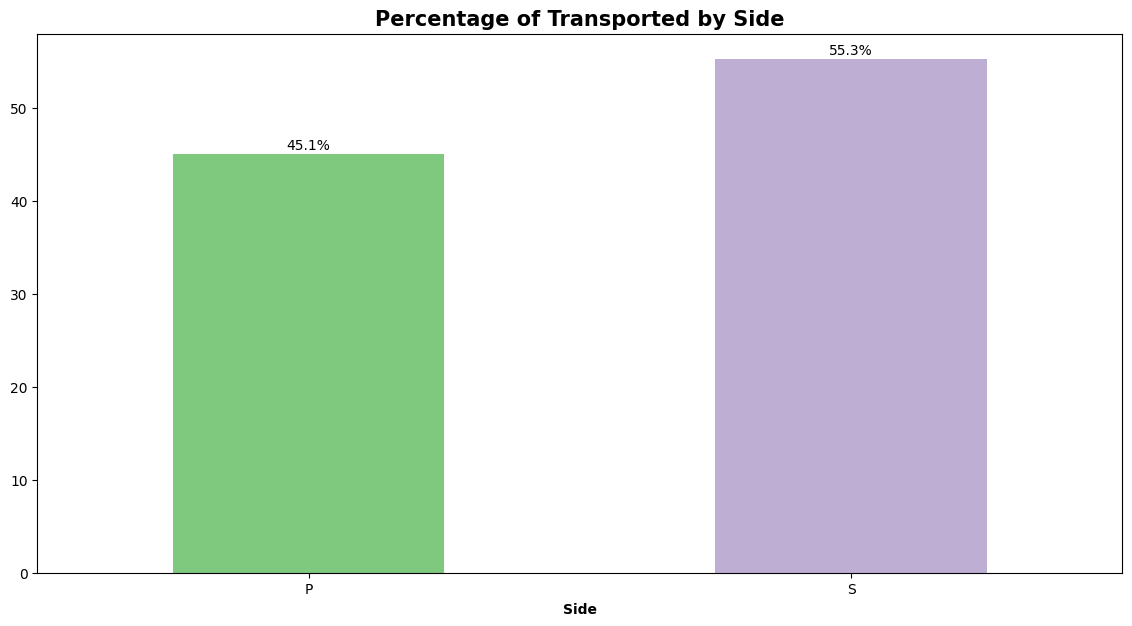

In [449]:
plt.figure(figsize=[14,7])

# groupby-mean gives proportion of True’s directly
pct_trans2 = train_df.groupby('Side')['Transported'].mean().mul(100)

pct_trans2.plot(kind='bar', color=plt.get_cmap('Accent').colors)
plt.title("Percentage of Transported by Side", fontsize=15, fontweight='bold')
plt.xlabel("Side", fontweight='bold')
plt.xticks(rotation=0)

for i, val in enumerate(pct_trans2):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center')

plt.show()

**Insights**

- Side P has a higher count of non-transported individuals, whereas Side S shows more transported cases hinting at a side-based disparity in transport outcomes.

#### 4.8 Does being Alone have influence transportation outcomes

In [450]:
train_df.groupby('IsAlone')['Transported'].value_counts(normalize=True).to_frame()*100

proportion
IsAlone Transported            
False   True          56.687243
        False         43.312757
True    False         54.755463
        True          45.244537

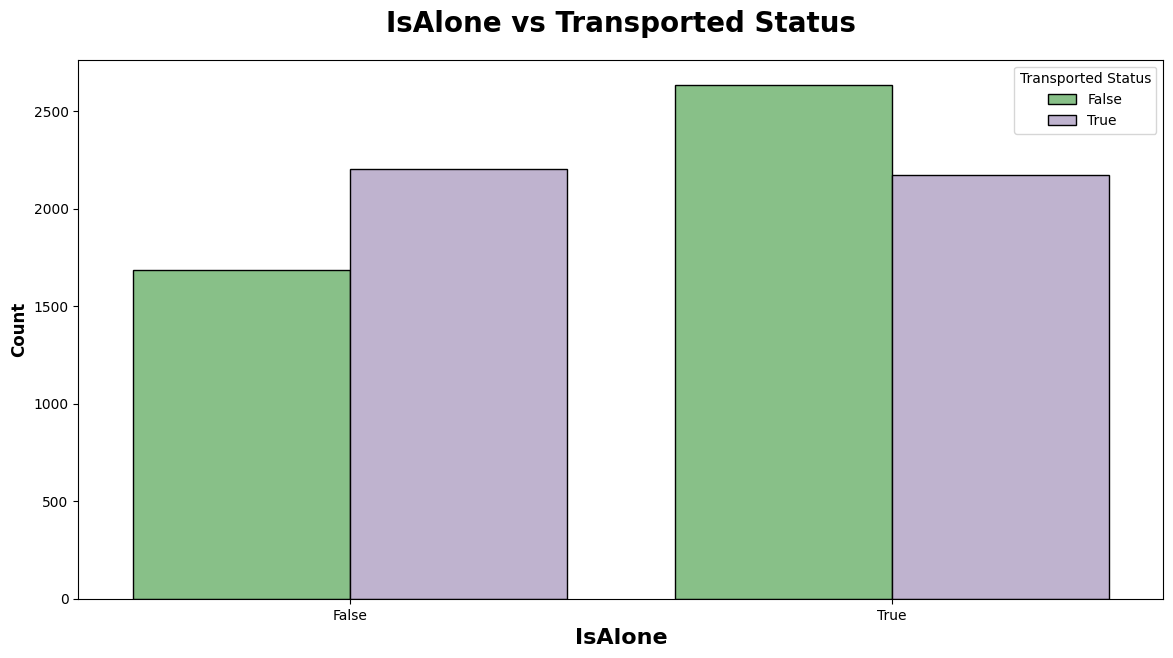

In [451]:
plt.subplots(figsize=(14,7))
sns.countplot(x="IsAlone",hue="Transported", data=train_df, ec = "black",palette="Accent")
plt.title("IsAlone vs Transported Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("IsAlone", weight="bold", fontsize=16)
plt.legend(title="Transported Status", fancybox=True)
plt.show()

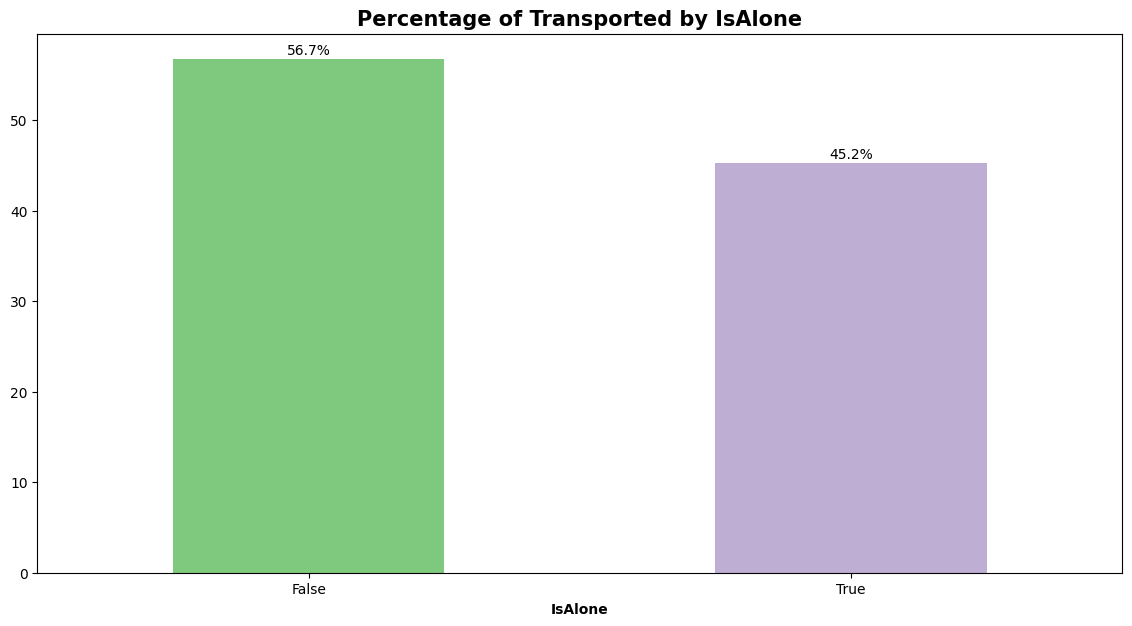

In [452]:
plt.figure(figsize=[14,7])

# groupby-mean gives proportion of True’s directly
pct_trans2 = train_df.groupby('IsAlone')['Transported'].mean().mul(100)

pct_trans2.plot(kind='bar', color=plt.get_cmap('Accent').colors)
plt.title("Percentage of Transported by IsAlone", fontsize=15, fontweight='bold')
plt.xlabel("IsAlone", fontweight='bold')
plt.xticks(rotation=0)

for i, val in enumerate(pct_trans2):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center')

plt.show()

**Insights**
- Individuals traveling alone are less likely to be transported: alone passengers with transported status False (~2500) exceed those with True (~2000), whereas non-alone travelers have more transported (~2200) than non-transported (~1500).
- This suggests companionship may influence transport success
---

# 5) Feature Engineering

## 5.1 Feature Transformation

In [453]:
train_df.dropna(inplace=True)
train_numeric_features = train_df.select_dtypes(include=['float64', 'int64']).columns

In [454]:
X = train_df.drop(columns=['Transported'])
y = train_df['Transported']

In [455]:
y.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [456]:
y= np.where(y==True, 1,0)

In [457]:
y

array([0, 1, 0, ..., 1, 0, 1])

In [458]:
X[train_continuous_features].skew(axis=0, skipna=True)

Age              0.431102
RoomService      6.397766
FoodCourt        7.177515
ShoppingMall    12.763842
Spa              7.716450
VRDeck           7.904554
CabinNo          0.746458
TotalSpend       4.417588
dtype: float64

## 5.2 Preprocessing using Column Transformer

In [459]:

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
transform_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','TotalSpend']
X_copy = pt.fit_transform(X[transform_features])
X_copy = pd.DataFrame(X_copy, columns=transform_features)

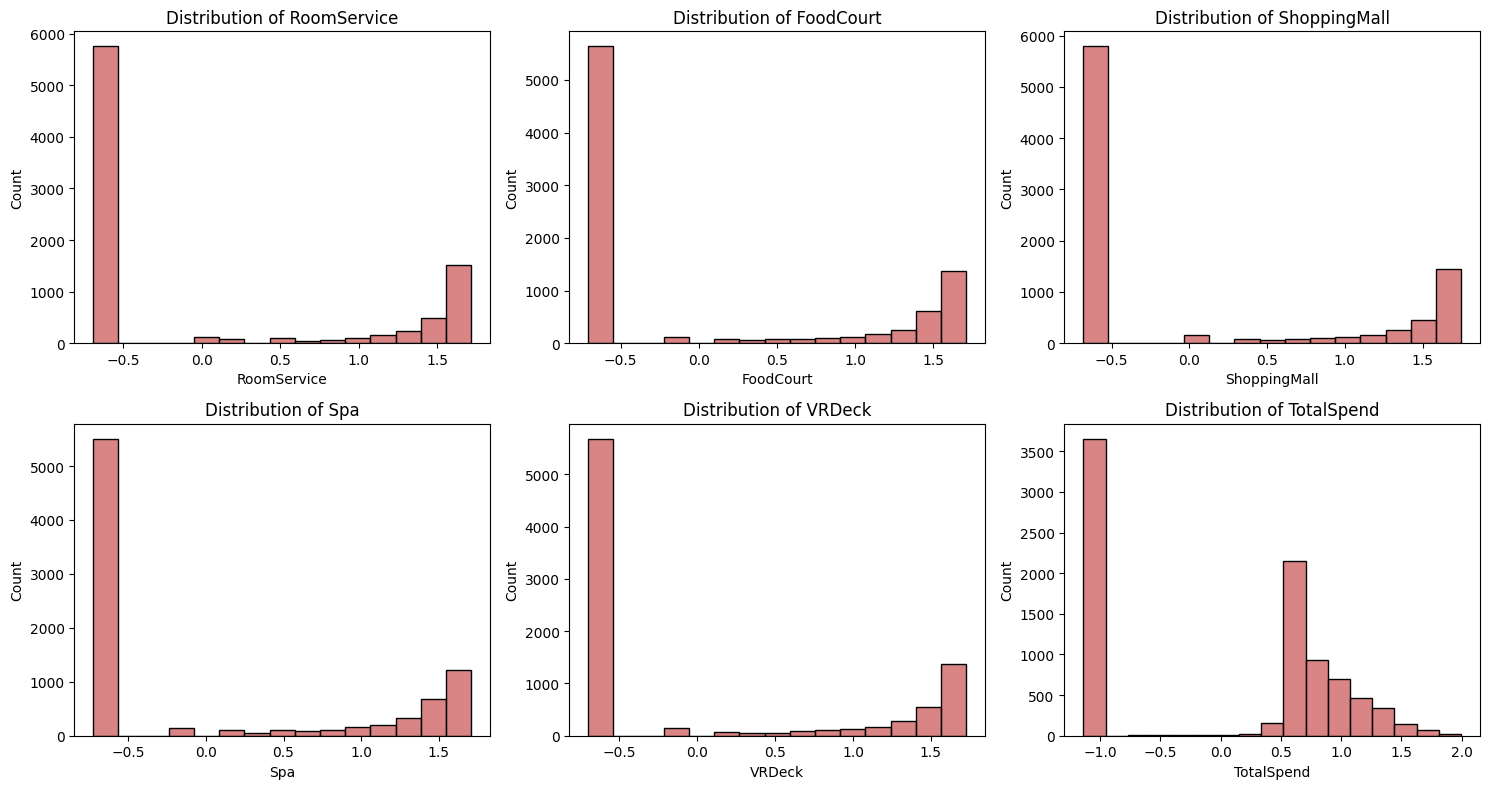

In [460]:
cols = transform_features
n_cols = 3  # number of columns per row
n_rows = math.ceil(len(cols) / n_cols)

plt.figure(figsize=(n_cols * 5, n_rows * 4))
for i, col in enumerate(cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(x=X_copy[col], color='indianred')
    plt.xlabel(col)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

In [461]:
X_copy.skew(axis=0, skipna=True)


RoomService     0.837498
FoodCourt       0.792571
ShoppingMall    0.868692
Spa             0.747434
VRDeck          0.815399
TotalSpend     -0.143704
dtype: float64

In [462]:
for feature in train_categorical_features:
    print(feature,':', train_df[feature].nunique())

HomePlanet : 3
CryoSleep : 2
Destination : 3
VIP : 2
Deck : 8
Side : 2
IsAlone : 2


In [463]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [464]:
num_features

['CryoSleep',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'CabinNo',
 'Group',
 'Passenger',
 'TotalSpend',
 'GroupSize',
 'IsAlone']

In [465]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define your column groups (example, adjust based on your dataset)
oh_columns = ['Deck']          # categorical features to one-hot encode
or_columns = ['HomePlanet', 'Destination','Side', 'VIP', 'CryoSleep', 'IsAlone']         # categorical features for ordinal encoding (binary or ordered)
transform_columns = [ 'Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'TotalSpend']  # numerical features to transform
num_features = []  # If you want to separately standard scale some numerical features without transform

# Define transformers
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)
ordinal_encoder = OrdinalEncoder()
power_transformer = PowerTransformer(method='yeo-johnson')

# Pipeline for power transform
transform_pipe = Pipeline([
    ('power_transform', power_transformer)
])

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("onehot", oh_transformer, oh_columns),
        ("ordinal", ordinal_encoder, or_columns),
        ("power_transform", transform_pipe, transform_columns),
        ("scaler", numeric_transformer, num_features)
    ],
    remainder='passthrough'  # keep other columns unchanged, optional
)


In [466]:
X = preprocessor.fit_transform(X)

c:\Users\marcd\anaconda3\envs\spaceship-titanic\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [467]:
X.shape

(8693, 25)

**Classification**

## 5.3 Train Test Split

In [468]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((6954, 25), (1739, 25))

In [469]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [470]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [471]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()

}

In [472]:
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    auc= []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        accuracy_list.append(model_test_accuracy)
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        auc.append(model_test_rocauc_score)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=['Accuracy'], ascending=False)
        
    return report

## 5.4 Model Training

In [473]:
base_model_report =evaluate_models(X, y, models=models)

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7913
- F1 score: 0.7896
- Precision: 0.8040
- Recall: 0.7756
- Roc Auc Score: 0.7914


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7470
- F1 score: 0.7539
- Precision: 0.7407
- Recall: 0.7677
- Roc Auc Score: 0.7468


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8292
- F1 score: 0.8355
- Precision: 0.8104
- Recall: 0.8623
- Roc Auc Score: 0.8289
----------------------------------
Model performance for Test set
- Accuracy: 0.7936
- F1 score: 0.8020
- Precision: 0.7775
- Recall: 0.8280
- Roc Auc Score: 0.7932


Logistic Regression
Model performance for Training 

c:\Users\marcd\anaconda3\envs\spaceship-titanic\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBClassifier
Model performance for Training set
- Accuracy: 0.9504
- F1 score: 0.9511
- Precision: 0.9442
- Recall: 0.9580
- Roc Auc Score: 0.9503
----------------------------------
Model performance for Test set
- Accuracy: 0.7970
- F1 score: 0.7972
- Precision: 0.8042
- Recall: 0.7904
- Roc Auc Score: 0.7971


CatBoosting Classifier
Model performance for Training set
- Accuracy: 0.8891
- F1 score: 0.8909
- Precision: 0.8823
- Recall: 0.8997
- Roc Auc Score: 0.8891
----------------------------------
Model performance for Test set
- Accuracy: 0.8091
- F1 score: 0.8135
- Precision: 0.8027
- Recall: 0.8246
- Roc Auc Score: 0.8089


Support Vector Classifier
Model performance for Training set
- Accuracy: 0.5581
- F1 score: 0.5575
- Precision: 0.5620
- Recall: 0.5531
- Roc Auc Score: 0.5581
----------------------------------
Model performance for Test set
- Accuracy: 0.5515
- F1 score: 0.5497
- Precision: 0.5574
- Recall: 0.5421
- Roc Auc Score: 0.5516


AdaBoost Classifier
Model performa

In [474]:
base_model_report

,Model Name,Accuracy
6,CatBoosting Classifier,0.809086
5,XGBClassifier,0.797010
2,Gradient Boosting,0.793560
0,Random Forest,0.791259
8,AdaBoost Classifier,0.784359
3,Logistic Regression,0.753306
1,Decision Tree,0.746981
4,K-Neighbors Classifier,0.558942
7,Support Vector Classifier,0.551466


## 5.5 Hyper Parameter Tuning

In [475]:
xgboost_params = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2),
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

catboost_params = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 300, 500],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128],
    'verbose': [0]
}

gradient_boosting_params = {
    'loss': ['log_loss', 'exponential'],  # 'log_loss' is standard for classification
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

In [476]:
randomcv_models = [
    ('XGBoost', XGBClassifier(), xgboost_params),
    ('CatBoost', CatBoostClassifier(verbose=False), catboost_params),
    ('GradientBoosting', GradientBoostingClassifier(), gradient_boosting_params)
]


In [477]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2, 
                                   n_jobs=-1)
    random.fit(X, y)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for XGBoost -------------------
{'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}
---------------- Best Params for CatBoost -------------------
{'verbose': 0, 'learning_rate': 0.01, 'l2_leaf_reg': 1, 'iterations': 100, 'depth': 8, 'border_count': 32}
---------------- Best Params for GradientBoosting -------------------
{'subsample': 0.8, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 3, 'loss': 'exponential', 'learning_rate': 0.01}


In [478]:
model_param

{'XGBoost': {'subsample': 1.0,
  'n_estimators': 100,
  'min_child_weight': 3,
  'max_depth': 9,
  'learning_rate': 0.01,
  'gamma': 0,
  'colsample_bytree': 0.8},
 'CatBoost': {'verbose': 0,
  'learning_rate': 0.01,
  'l2_leaf_reg': 1,
  'iterations': 100,
  'depth': 8,
  'border_count': 32},
 'GradientBoosting': {'subsample': 0.8,
  'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 2,
  'max_features': 'log2',
  'max_depth': 3,
  'loss': 'exponential',
  'learning_rate': 0.01}}

In [479]:
from sklearn.metrics import roc_auc_score,roc_curve
best_models = {
    "Gradient Boosting Classifier": GradientBoostingClassifier(**model_param['GradientBoosting']),
    "CatBoost Classifier": CatBoostClassifier(**model_param['CatBoost']),
    "XGBClassifier": XGBClassifier(**model_param['XGBoost'], n_jobs=-1),
}
tuned_report = evaluate_models(X, y, models=best_models)

Gradient Boosting Classifier
Model performance for Training set
- Accuracy: 0.7744
- F1 score: 0.7654
- Precision: 0.8029
- Recall: 0.7311
- Roc Auc Score: 0.7747
----------------------------------
Model performance for Test set
- Accuracy: 0.7665
- F1 score: 0.7598
- Precision: 0.7906
- Recall: 0.7312
- Roc Auc Score: 0.7669


CatBoost Classifier
Model performance for Training set
- Accuracy: 0.8069
- F1 score: 0.8122
- Precision: 0.7952
- Recall: 0.8300
- Roc Auc Score: 0.8067
----------------------------------
Model performance for Test set
- Accuracy: 0.7809
- F1 score: 0.7912
- Precision: 0.7624
- Recall: 0.8223
- Roc Auc Score: 0.7805


XGBClassifier
Model performance for Training set
- Accuracy: 0.8712
- F1 score: 0.8712
- Precision: 0.8765
- Recall: 0.8660
- Roc Auc Score: 0.8712
----------------------------------
Model performance for Test set
- Accuracy: 0.7947
- F1 score: 0.7984
- Precision: 0.7917
- Recall: 0.8052
- Roc Auc Score: 0.7946




In [480]:
tuned_report

,Model Name,Accuracy
2,XGBClassifier,0.794710
1,CatBoost Classifier,0.780909
0,Gradient Boosting Classifier,0.766532


In [490]:
# Initialize and train the best model
best_model = XGBClassifier(**model_param['XGBoost'], n_jobs=-1)
best_model = best_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = best_model.predict(X_test)
score = accuracy_score(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Output results
print("FINAL MODEL 'XGBoost'")
print("Accuracy Score value: {:.4f}".format(score))
print(cr)

FINAL MODEL 'XGBoost'
Accuracy Score value: 0.7947
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       861
           1       0.79      0.81      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


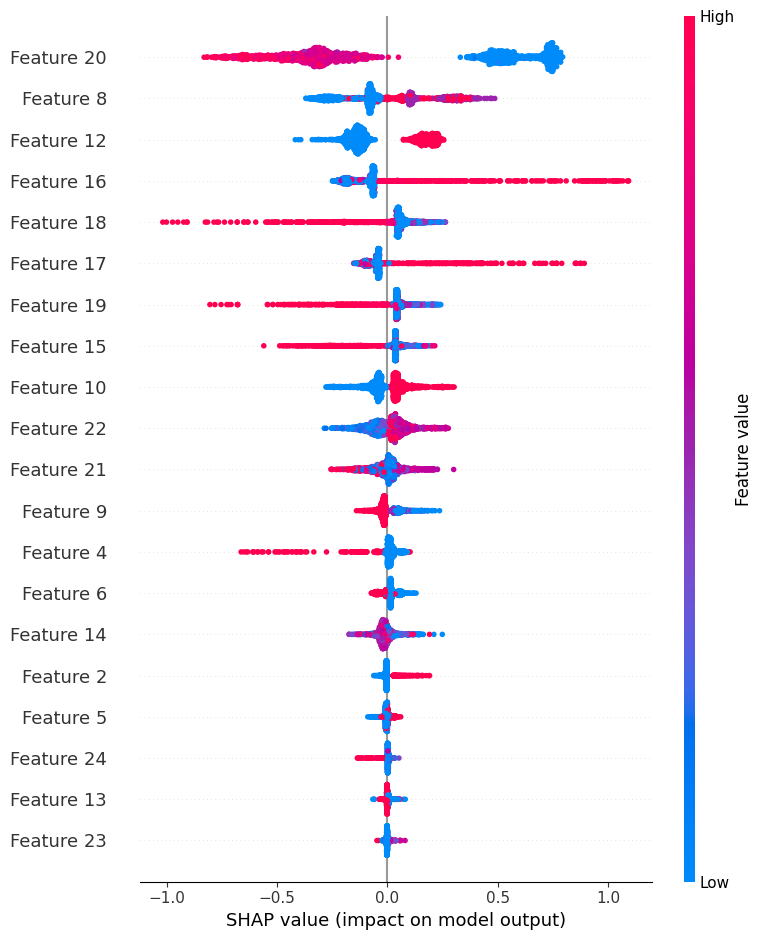

In [494]:
import shap
explainer = shap.Explainer(best_model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

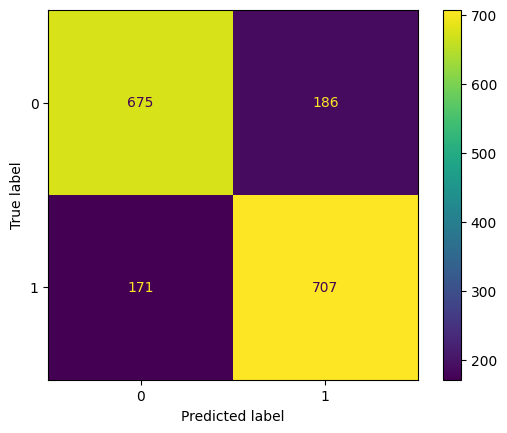

In [495]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

In [496]:
# Define numerical and categorical columns for test
test_numeric_features = test_df.select_dtypes(include=['float64', 'int64']).columns
test_categorical_features = test_df.select_dtypes(include=['object', 'category', 'bool']).columns

# Fill missing values in test_df
for col in test_numeric_features:
    if test_df[col].isnull().sum() > 0:
        median_val = test_df[col].median()
        test_df[col].fillna(median_val, inplace=True)

for col in test_categorical_features:
    if test_df[col].isnull().sum() > 0:
        mode_val = test_df[col].mode()[0]
        test_df[col].fillna(mode_val, inplace=True)

# Print columns info
print('We have {} numerical features : {}'.format(len(test_numeric_features), list(test_numeric_features)))
print('\nWe have {} categorical features : {}'.format(len(test_categorical_features), list(test_categorical_features)))


We have 11 numerical features : ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'CabinNo', 'Group', 'Passenger', 'TotalSpend', 'GroupSize']

We have 7 categorical features : ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side', 'IsAlone']


In [497]:
X_test_processed = preprocessor.fit_transform(test_df)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [498]:
X_test_processed.shape

(4277, 25)

In [499]:
X.shape

(8693, 25)

## 5.6 Output

In [500]:
model = CatBoostClassifier(verbose=False)
model.fit(X_train, y_train)  # if not yet trained
# or if you've saved the model earlier:
# model = joblib.load("catboost_model.pkl")
test_preds = model.predict(X_test_processed)
test_preds_prob = model.predict_proba(X_test_processed)[:, 1]
submission = pd.DataFrame({
    "PassengerId": passenger_ids,
    "Transported": test_preds.astype(bool)  # Convert to True/False if needed
})

In [501]:
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True
